# HomeWork 2 : Simple sampling problems

*Luca Grandinetti, Iacopo Poli, Davide Romanin, Gennaro Tucci*

In [35]:
# Importing libraries:
# - numpy for arrays, RNG and algebra
# - matplotlib for plots
# - time to acquire computational times

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from time import time

## Sampling discrete distributions

In [36]:
# function that creates a discrete distribution

def create_discrete_dist(n_items):
    # creates a collection of floats 
    # uniformly distributed in [0, 1[
    collection = np.random.rand(n_items)
    
    # compute the normalization
    Z = sum(collection)
    
    #return the distribution
    return collection/Z

### Accept/reject procedure

In [37]:
# function that implements the Accept/Reject procedure: 
# it takes probability distribution and number of 
# samples needed as arguments and returns that
# number of samples according to the distribution.
# PROCEDURE: 
# - create a rectangle of height=max(probabilities), 
#   width=length(probabilities)
# - draw two random numbers in [0, width] and 
#   [0, height], which will be the coordinates (x,y)
# - take the integer part ix of x
# - if p[ix] > y return ix, else repeat the procedure

def accept_reject(prob, n):
    height = np.amax(prob)
    width = len(prob)
    
    samples = []
    for i in xrange(0, n):
        while(True):
            x = np.random.rand()*width
            y = np.random.rand()*height
        
            # cast to int to avoid warnings 
            # because vector index is a float
            ix = int(np.floor(x))
        
            if prob[ix] > y:
                samples.append(ix)
                break
    
    return samples

In [38]:
n_items = 5
p = create_discrete_dist(n_items)
n_samples = 100000

samples = accept_reject(p, n_samples)

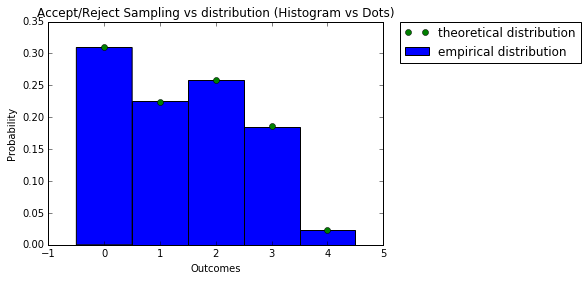

In [39]:
plt.hist(samples, bins = n_items, 
         range = (-0.5, n_items - 0.5), normed = 1, 
         label = "empirical distribution")
plt.plot(p, "o", label="theoretical distribution")

plt.xlabel('Outcomes')
plt.ylabel('Probability')
plt.title('Accept/Reject Sampling vs distribution (Histogram vs Dots)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Tower Sampling procedure

In [40]:
# function that implements the Tower Sampling procedure: 
# it takes the probability distribution and number of 
# samples needed as arguments and returns that
# number of samples according to the distribution.
# Precomputation: compute the cumulative distribution
# PROCEDURE: 
# - sample a random number x
# - initialize an integer index ix
# - while(cumulative[ix] <x): ix += 1
# - else return ix

def tower_sampling(prob, n):
    # PRECOMPUTATION
    cumulative = []
    for i in xrange(1, len(prob)+1):
        cumulative.append(np.sum(prob[0:i]))
    
    # PROCEDURE
    samples = []
    for i in xrange(0, n):
        x = np.random.rand()
        ix = 0
    
        while(cumulative[ix] < x):
            ix += 1
        
        samples.append(ix)
        
    return samples

In [41]:
samples = tower_sampling(p, n_samples)

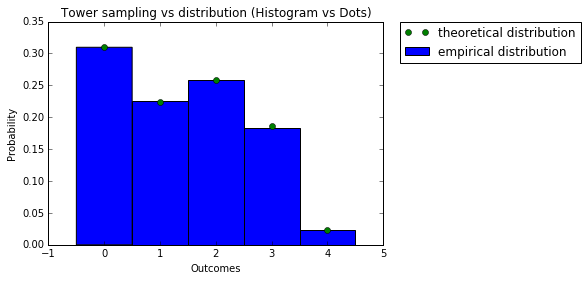

In [42]:
plt.hist(samples, bins = n_items, 
         range = (-0.5, n_items - 0.5), normed = 1, 
         label="empirical distribution")
plt.plot(p, "o", label="theoretical distribution")

plt.xlabel('Outcomes')
plt.ylabel('Probability')
plt.title('Tower sampling vs distribution (Histogram vs Dots)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [43]:
# function that implements the Tower Sampling procedure: 
# it takes the probability distribution and number of 
# samples needed as arguments and returns that
# number of samples according to the distribution.
# PROCEDURE: 
# Precomputation: compute the cumulative distribution
# - sample a random number x
# - initialize an integer index ix
# - COMPARISON BY DICHOTOMY
# - return ix

def smart_tower_sampling(prob, n):
    # PRECOMPUTATION
    cumulative = [0]
    for i in xrange(1, len(prob)+1):
        cumulative.append(np.sum(prob[0:i]))

    # PROCEDURE
    samples = []
    for i in xrange(0, n):
        x = np.random.rand()
        imin = 0
        imax = len(cumulative)-1
    
        while(True):
            ix = (imax+imin)/2
            if(cumulative[ix] < x):
                imin = ix
            else:
                imax = ix
            if(imin == imax-1):
                ix = (imax+imin)/2
                samples.append(ix)
                break
    
    return samples

In [44]:
samples = smart_tower_sampling(p, n_samples)

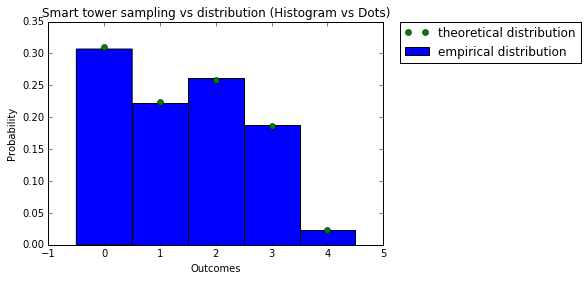

In [45]:
plt.hist(samples, bins = n_items, range = (-0.5, n_items - 0.5), normed = 1, label="empirical distribution")
plt.plot(p, "o", label="theoretical distribution")

plt.xlabel('Outcomes')
plt.ylabel('Probability')
plt.title('Smart tower sampling vs distribution (Histogram vs Dots)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Running times

In [63]:
running_times_AR = []
running_times_TS = []
running_times_smart_TS = []

iter = [5, 10, 25, 50, 75, 100, 250, 500, 750, 1000, 2500, 5000]

In [64]:
for n in iter:
    # ACCEPT/REJECT
    p = create_discrete_dist(n)
    t0AR = time()
    accept_reject(p, n_samples)
    t1AR = time()
    running_times_AR.append(t1AR-t0AR)
    
    # TOWER SAMPLING
    t0TS = time()
    tower_sampling(p, n_samples)
    t1TS = time()
    running_times_TS.append(t1TS-t0TS)
    
    # SMART TOWER SAMPLING
    t0TS_smart = time()
    smart_tower_sampling(p, n_samples)
    t1TS_smart = time()
    running_times_smart_TS.append(t1TS_smart-t0TS_smart)

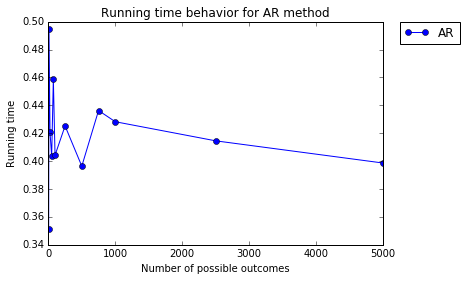

In [66]:
plt.plot(iter, running_times_AR, "o-", label= "AR")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of possible outcomes')
plt.ylabel('Running time')
plt.title('Running time behavior for AR method')
plt.show()

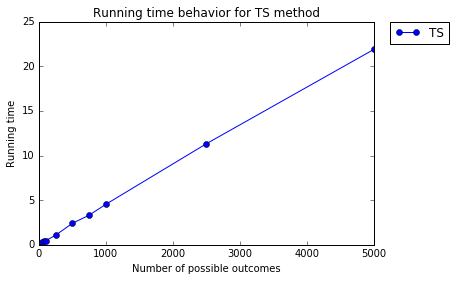

In [67]:
plt.plot(iter, running_times_TS, "o-", label= "TS")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of possible outcomes')
plt.ylabel('Running time')
plt.title('Running time behavior for TS method')
plt.show()

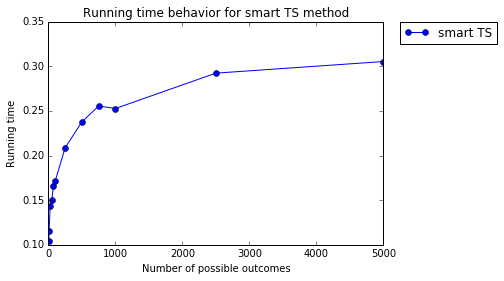

In [68]:
plt.plot(iter, running_times_smart_TS, "o-", label= "smart TS")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of possible outcomes')
plt.ylabel('Running time')
plt.title('Running time behavior for smart TS method')
plt.show()

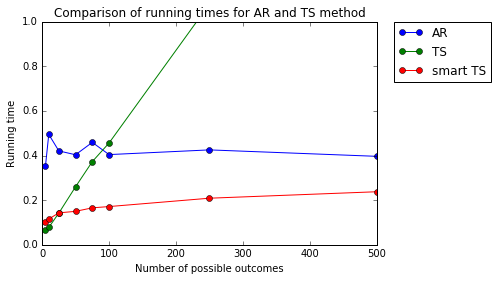

In [69]:
plt.plot(iter, running_times_AR, "o-", label= "AR")
plt.plot(iter, running_times_TS, "o-", label= "TS")
plt.plot(iter, running_times_smart_TS, "o-", label= "smart TS")
plt.xlim([0, 500])
plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of possible outcomes')
plt.ylabel('Running time')
plt.title('Comparison of running times for AR and TS method')
plt.show()

Accept/Reject procedure is $O(1)$, which is constant running time, since it has to do only one comparison.

Tower Sampling procedure is $O(N)$ (with N number of possible outcomes of the discrete distribution) in the case of naive comparisons and $O(\log N)$ in the case of dichotomy.

Tower Sampling has the advantage of being rejection-free, but has to compute the cumulative distribution, which is a $O(N)$ operation. This problem can be bypassed computing it once and for all. 

As $n_{item}$ grows, the fastest way to solve the problem is smart Tower Sampling, but it should be noted that Accept/Reject is faster than the naive Tower Sampling for high $n_{item}$. We expect that at much higher $N_{item}$ Accept/Reject will be better than smart Tower Sampling.

#### Rejection rate and running time in Accept/Reject algorithm

The running time of Accept/Reject algorithm is $O(1)$ only if the sampling procedure has no rejection, otherwise it can increase.  

Defining the rejection rate (RR) as the ratio between the rejection area and the total area of the rectangle, we have:

$$
RR = \left ( N \cdot p_{max} - \displaystyle \sum_{i=1}^N p_i \right )\frac{1}{N \cdot p_{max}} = 1-\frac{1}{N \cdot p_{max}}
$$

since the probability distribution is normalized ($\sum_{i=1}^N p_i = 1$). The acceptance rate (AR) is just

$$
AR = \frac{1}{N \cdot p_{max}}
$$

This is the probability of success, so the expected number of iterations (i.e. the running time of the algorithm) is just the inverse of this:

$$
RT = N \cdot p_{max}
$$

We just need to find its asymptotic behavior with $N$, and it depends on the asymptotic behavior of $p_{max}$.
Let's discuss $p_{max}$, by definition it is:

$$
p_{max} = \frac{\max_i \{ R_i\}}{\displaystyle \sum_{i=1} R_i}
$$

where $R_i$ are the random numbers drawn in this case from a uniform distribution $U(0, 1)$. The denominator is extensive, so it's proportional to N, for the numerator we have to use *limit theorems for extremes* from probability theory.

**Limit theorems for extremes**

We're considering a sequence of $\{R_i\}$ i.i.d. random variables, we can define a random variable $Z_N = \max \{ R_1, R_2, \ldots, R_N \}$. Our problem is to find two coefficient $a_N$, $b_N$ such that:

$$
Z_N = a_N + b_N \Lambda
$$

and

$$
P\{\Lambda < x\} \to H(x) \mbox{ as } N \to \infty
$$

and H(x) is non degenerate (it does not take a single value).

The idea is that

$$
P\{Z_N \le x\} = P\{R_i \le x\, \forall i\} = F(x)^N
$$

Therefore we need to find

$$
P\{Z_N \le a_N + b_N x\} = F(a_N + b_N x)^N \to H(x) \mbox{ as } N \to infty
$$

This means that this condition must realize: $F(a_N + b_N x) \simeq 1$, so we can expand

$$
P\{Z_N \le a_N + b_N x\} = e^{-N\ln F} \simeq e^{-N(1-F)}
$$

therefore $a_N$ and $b_N$ must be such that

$$
\lim_{N \to \infty} N(1-F) = \lim_{N \to \infty} N \int_{a_N + b_N x}^{\infty} dy f(y) = c(x) \mbox{ is finite.}
$$

In the case of a uniform distribution $U(0,1)$, we have possible sequences:

$$
a_N = 1
$$

$$
b_n\mbox{: } N \int_{1-b_N}^{1} dy = 1 \to b_N = \frac{1}{N}
$$

and the limiting distribution for the max is an exponential distribution. Using our results for $a_N$ and $b_N$ we can estimate the max:

$$
Z_N = 1 + \frac{1}{N} \Lambda = O(1)
$$

where $\Lambda$ is distribution according to $P(x)$ which converges to an exponential distribution as $N \to \infty$.  

Consequently the estimate for $p_{max}$ is $p_{max} = O(1/N)$, and therefore the running time (RT) of the algorithm can be estimated as the rejection rate

$$
RT = N \cdot p_{max} - 1 = O(1)
$$

In the case of a discrete distribution built starting from samples drawn from a uniform, the rejection rate does not influence the running time of the algorithm.

### Sampling $r_i$ from an exponential distribution

For the exponential distribution the possible sequences are:

$$
a_N \mbox{: } N\int_{a_N}^{\infty} dx e^{-x} = 1 \to a_N = \log N
$$

$$
b_N\mbox{: } b_N = \frac{\int_{a_N}^\infty dy \int_{y}^\infty dx e^{-x}}{\int_{a_N}^\infty dx e^{-x}} = \frac{\log N}{N}
$$

therefore the estimate for the max is:

$$
Z_N = \log N + \frac{\log N}{N} \Lambda = O(\log N)
$$

where $\Lambda$ is a random variable with probability distribution which converges to a Gumbel distribution as $N \to \infty$.

$$p_{max} =  O \left (\frac{\log N}{N} \right )$$ 

and the running time of the accept/reject algorithm is

$$
RT = O(\log N)
$$

In [70]:
def create_discrete_dist_exp(n_items):
    # creates a collection of floats drawn 
    # from an exponential distribution
    # 1-rand() to avoid log(0), since rand() 
    # returns a float in [0, 1[
    collection = -np.log(1 - np.random.rand(n_items))
    
    # compute the normalization
    Z = sum(collection)
    
    #return the distribution
    return collection/Z

In [71]:
# function that computes the rejection rate

def RR(prob):
    height = np.amax(prob)
    width = len(prob)
    
    distribution_area = np.sum(prob)
    return 1-distribution_area/(height*width)

In [72]:
running_times_exp_AR = []
rejection_rate = []
max_p = []
iter = [5, 10, 25, 50, 75, 100, 250, 500, 750, 1000, 2500, 5000, 10000, 25000, 50000, 100000, 1000000]

for n in iter:
    p = create_discrete_dist_exp(n)
    max_p.append(np.amax(p))
    rejection_rate.append(RR(p))
    t0AR = time()
    accept_reject(p, n_samples)
    t1AR = time()
    running_times_exp_AR.append(t1AR-t0AR)

In [73]:
from scipy.optimize import curve_fit

def f(x, a, b):
    return a*np.log(x)/x +b

popt, pcov = curve_fit(f, iter, max_p)
fit = f(iter, *popt)

(0, 1000)

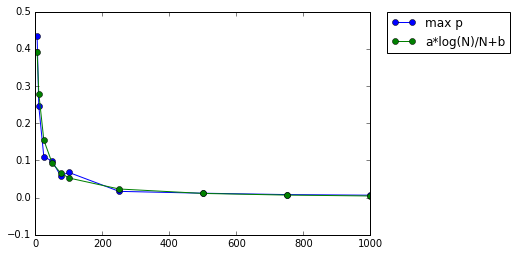

In [74]:
plt.plot(iter, max_p, "o-", label="max p")
plt.plot(iter, fit, "o-", label="a*log(N)/N+b")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([0, 1000])

In [77]:
def f(x, a, b):
    return a*np.log(x) +b

popt, pcov = curve_fit(f, iter, running_times_exp_AR)
fit = f(iter, *popt)

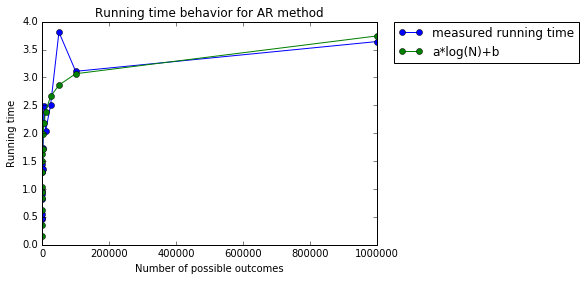

In [81]:
plt.plot(iter, running_times_exp_AR, "o-", label="measured running time")
plt.plot(iter, fit, "o-", label="a*log(N)+b")
plt.xlabel('Number of possible outcomes')
plt.ylabel('Running time')
plt.title('Running time behavior for AR method')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Sampling from a Pareto distribution

Now we sample $r_i$ from a Pareto distribution. Indeed, drawing random numbers using

$$ R = \frac{1}{U^{1/2}} $$

means drawing from $P_R(x) = 2x^{-3}$. Consider

$$Y = \frac{1}{X^{1/2}} \rightarrow X = Y^{-2}$$

$$P_Y(y) = P_X(x) |\frac{dx}{dy}| = 2y^{-3}$$

where the support of the new distribution is $[1, \infty)$. The general form of a Pareto distribution is

$$P_X(x) = \frac{\alpha x_m^\alpha}{x^{\alpha+1}} \mbox{ for } x \ge x_m$$

and $0$ otherwise. Therefore we are drawing from a Pareto with $x_m = 1$ and $\alpha = 2$.

For this distribution the sequences are:

$$
a_N = 0
$$

$$
b_N\mbox{: } N \int_{b_N}^{\infty} dx 2x^{-3} = 1 \to b_N = \sqrt{N}
$$

therefore

$$
Z_N = \sqrt{N} \Lambda = O(\sqrt{N})
$$

where $\Lambda$ is a random variable with a distribution which converges to a Fréchet $P(x) = e^{-x^{-2}}$, which has mean $\mathbb{E}[\Lambda] = \sqrt{\pi}$ and infinite variance. From this formula it is also evident that the fluctuations of the max are of the same order of the fluctuations of the sum.

A naive analysis may conclude that

$$
p_{max} = O(\sqrt{N}/N)
$$

and finally

$$
RT = O(\sqrt{N})
$$

**but** being the variance of the Fréchet divergent, there is a finite probability that $Z_N$ will strongly deviate from the mean and the behavior $O(\sqrt{N})$ will be hidden by a large amount of noise.

In [10]:
def create_discrete_dist_sqrt(n_items):
    # create a collection of floats 
    # distributed following a Pareto
    collection = 1/np.sqrt(1-np.random.rand(n_items))
    
    #compute the max of R_i
    maxR = np.amax(collection)
    
    # compute the normalization (sum)
    Z = sum(collection)
    
    # return the distribution, the sum, the max
    return collection/Z, Z, maxR

Let's show that fluctuations of max and sum are of the same order.

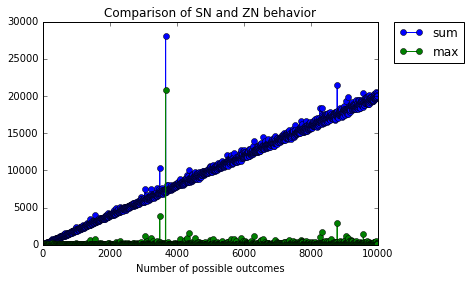

In [48]:
SN = []
ZN = []
RATIO = []
start = 1
nitem = 10001
step = 5

for i in xrange(start, nitem, step):
    p, SUM, RMAX = create_discrete_dist_sqrt(i)
    SN.append(SUM)
    ZN.append(RMAX)
    RATIO.append(RMAX/SUM)
    
plt.plot(xrange(start, nitem, step), SN, "o-", label="sum")
plt.plot(xrange(start, nitem, step), ZN, "o-", label="max")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of possible outcomes')
plt.title('Comparison of SN and ZN behavior')

It is evident that the sum is proportional to N and that its fluctuations are those of the max.

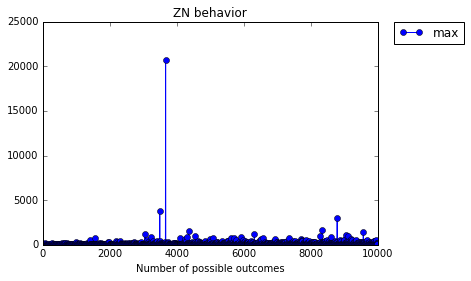

In [51]:
plt.plot(xrange(start, nitem, step), ZN, "o-", label="max")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of possible outcomes')
plt.title('ZN behavior')

(0, 500)

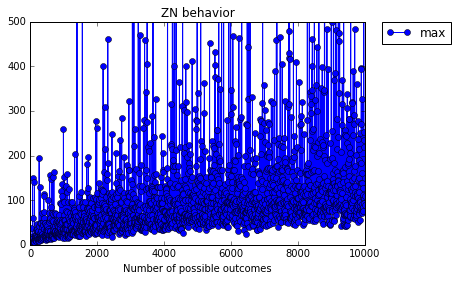

In [56]:
plt.plot(xrange(start, nitem, step), ZN, "o-", label="max")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of possible outcomes')
plt.title('ZN behavior')
plt.ylim([0, 500])

Really big outliers and very dispersed population for $Z_N$.

In [65]:
running_times_pareto_AR = []

start = 1
n_items = 1001
step = 50

n_samples = 100000

for n in xrange(start, n_items, step):
    # ACCEPT/REJECT
    p, sumR, maxR = create_discrete_dist_sqrt(n)
    t0 = time()
    accept_reject(p, n_samples)
    t1 = time()

    running_times_pareto_AR.append(t1-t0)

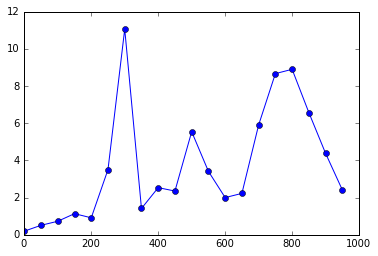

In [66]:
plt.plot(xrange(start, n_items, step), running_times_pareto_AR, "o-", label="measured running time")

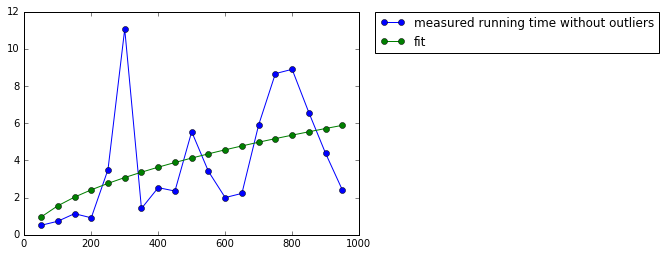

In [67]:
N = np.asarray(xrange(start, n_items, step))

def f(x, a, b):
    return a*np.power(x, 0.5)+b

popt, pcov = curve_fit(f, N, running_times_pareto_AR)
fit = f(N, *popt)

plt.plot(N, running_times_pareto_AR, "o-", label="measured running time without outliers")
plt.plot(N, fit, "o-", label="fit")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The fit is totally non-sense given the previous discussion, but it's just to show how dispersed are the data around it.

## Sampling $\pi$ with direct sampling

We want to estimate $\pi$ by sampling uniformly points in the square between  $1 < x < 1$ and  $1 < y < 1$, and counting how many hits are inside the unit circle. For each point $i = 1, \ldots, N$, the random variable $S_i = 0$ if the point is outside the circle, and $S_i = 4$ if the point is inside the circle.

### Mean and variance of $P(S_i)$

Since we are sampling with uniform distribution,the probability of a hit in the circle of radius $l/2$ out of a square of dimension $l$ is given by the ratio of their areas:
$$p=\frac{A_{circle}}{A_{square}}=\frac{\pi l^2/4}{l^2}=\frac{\pi}{4}.$$

(A more rigorous derivation of the probability is derived at the end.)
Therefore the random variable $S_i$ has the following expression:

$$
S_i=
\begin{cases}
4 & \text{with probability $\frac{\pi}{4}$} \\
0 & \text{with probability $1-\frac{\pi}{4}$.}
\end{cases}
$$

The mean is then equal to 
$$m=4\cdot \frac{\pi}{4}+0\cdot\left(1-\frac{\pi}{4}\right)=\pi $$

and the variance is

$$\Delta =\left[4^2\cdot \frac{\pi}{4}+0\cdot\left(1-\frac{\pi}{4}\right)\right]-\pi^2=\pi(4-\pi).$$

### Unbiased estimators

Let's consider $N$ independent randomly distributed points and let $\hat{m}=\frac{1}{N}\sum_{i=1}^N S_i$ be an estimator for the mean and $\hat{\Delta}=\frac{1}{N}\sum_{i=1}^N S_i^2-\hat{m}^2$ an estimator for the variance.
Their average then is:

$$\langle \hat{m}\rangle =\frac{1}{N}\sum_{i=1} ^N \langle S_i\rangle=\pi $$

and 

$$\langle \hat{\Delta}\rangle=\frac{1}{N}\sum_{i=1}^N \langle S_i^2\rangle-\langle\hat{m}^2\rangle$$

$$=4\pi-\frac{1}{N^2}\sum_{ij}\langle S_i S_j\rangle=$$

$$=4\pi-\frac{1}{N^2}\left[N\langle S_i^2\rangle+N(N-1) \langle S_i S_j\rangle_{i\neq j}\right]=$$

$$=4\pi-\frac{4\pi}{N}-\pi^2+\frac{\pi^2}{N}=\frac{N-1}{N}\pi(4-\pi)$$

It follows that only the mean estimator is unbiased, while the estimator for the variance is approximately unbiased for sufficiently large $N$.

### Variance of $\hat{m}$

Let us compute the variance of the estimator $\hat{m}$

$$Var[\hat{m}]=\frac{1}{N^2}\sum_{i=1}^N Var[S_i]=\frac{\pi(4-\pi)}{N}.$$

Therefore, if we sample N random points we get an error for the mean of 

$$\epsilon =\sqrt{\frac{\pi(4-\pi)}{N}}.$$

### Direct sampling strategy

**Disclaimer**: the code of this section is written in Python 3, **results and plots are different on Python 2**.

In [ ]:
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
l=1000 #number of times the pi has been estimated for each N
num=15 #number of different N
N=[0]*num #vector of all N
pic=[[0]*l]*num 
var=[[0]*l]*num
varest=[]
av=[]

for k in range(num):
    
    N[k]=1000+(k+5)*120 #definition of N with the variation of k
   
    for i in range(l):#for every N I estimate pi l=1000 times

        somma1=0
        somma2=0
        
        for j in range(N[k]):
        
            x=2*random.random()-1
            y=2*random.random()-1
            
            s=0 
        
            if x**2+y**2<=1:
                s=4
            
            somma1+=s
            somma2+=s**2       
    
        pic[k][i]=somma1/N[k]
        var[k][i]=somma2/N[k]-(pic[k][i])**2
    
    
    av=av+[sum(pic[k])/l]
    varest=varest+[math.sqrt(math.pi*(4-math.pi)/N[k])]

In [ ]:
# here it is reported the average of the l estimations for each N ---> red points
plt.plot(N,av,'ro') 
# with respect to the 'real' value of pi ---> blue line
plt.plot(N,[math.pi]*num)

<img src="img/dispersion.png"/>

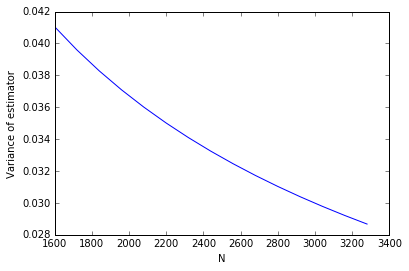

In [147]:
# error of the estimator of the average computed before: 
# it becomes always smaller with the increase of N ad its 
# value is consistent with the dispersion of the previuos plot.
plt.plot(N,varest)
plt.xlabel("N")
plt.ylabel("Variance of estimator")

In [ ]:
# estimation of the variance (red line) with 
# respect to the real value (blue line) with different N
plt.plot(N, [var[i][1] for i in range(num)],'r')
plt.plot(N,[math.pi*(4-math.pi)]*num,'b')

<img src="img/varest.png"/>

Derivation of the probability

We have to sample points $(X_i,Y_i)$ from two equal uniform distributions where

$$
p_{X}=
\begin{cases}
\frac{1}{2} & \text{if  $x \in [-1,1]$} \\
0 & \text{else.}
\end{cases}
$$

If we consider the random variable $X^2_i$ its distribution becomes

$$
p_{X^2}=
\begin{cases}
\frac{1}{2\sqrt{x}} & \text{if  $x \in [0,1]$} \\
0 & \text{else.}
\end{cases}
$$


The probability that the point $(X_i,Y_i)$ is inside the circle of radius $t\leq1$ is given by $P(X^2+Y^2\leq t)$.


$$P(X^2+Y^2\leq t)=\int_{-\infty}^{+\infty} dx \int_{-\infty}^{+\infty} dy p_{X^2}(x) p_{Y^2}(y)\delta (x+y-t)=$$
$$=\int_{-\infty}^{+\infty} dxp_{X^2}(x) p_{X^2}(t-x)$$

where last expression follows directly from the fact that $X^2$ and $Y^2$ are identically distributed.

In order to have the correct integration extrema it is necessary that the arguments of the $p$ must be in the interval $[0,1]$ otherwise it gives no contribution; then two cases follow:

1) In the first case $t \in [1,2]$ and integral to solve is

$\frac{1}{4}\int_{t-1}^{1} dx \frac{1}{\sqrt{(x(t-x))}};$

2) In the second $t \in [0,1]$ and the integral is

$\frac{1}{4}\int_{0}^{t} dx \frac{1}{\sqrt{(x(t-x))}}.$

The general resolution of the integral is given by

$$\frac{1}{4}\int_{a}^{b} dx \frac{1}{\sqrt{(x(t-x))}}=\frac{1}{4}\left[\arcsin\left(\frac{2b}{t}-1\right)-\arcsin\left(\frac{2a}{t}-1\right)\right].$$

We are interested in the second case with  $a=0, b=t$ and $t=1$: finally we get $P(X^2+Y^2\leq 1)=\frac{\pi}{4}.$

## Sampling $\pi$ with MCMC

In [69]:
import numpy as np
import random as r
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Evolve the Markov's chain and it also adds 1 to "a" for 
# every accepted move.
# Warning: the acceptance rate is a/(2N) where N is the 
# number of Markov's steps!

def step(x,y,d,a):
    xx=x-2.0*d*r.random()+d
    
    if abs(xx) <1:
        x=xx
        a=a+1.0
        
    yy=y-2.0*d*r.random()+d
    if abs(yy) <1:
        y=yy
        a=a+1.0
    return x,y,a

In [4]:
# It's our random variable, it is 4 if (x,y) is in the circle, 
# 0 otherwise.
def S(x,y):
    if x*x+y*y<1:
        return 4.0
    else:
        return 0

In [5]:
# This is the function to plot in the x-y plane data from a 
# simulation of N point with delta = d, starting from (0,0), 
# Legend: red points in the circle, blue out.
def plot(N,d):
    X=[0.0 for i in range(0,N)]
    Y=[0.0 for i in range(0,N)]
    a=0
    XX=[0.0]
    YY=[0.0]
    for i in range(0,N-1):
        X[i+1], Y[i+1],a= step(X[i],Y[i],d,a)  
        if S(X[i+1],Y[i+1])>0:
            XX=XX+[X[i+1] ]
            YY=YY+[Y[i+1]]
    plt.plot(X,Y,"b.",XX,YY,"r.")
    return 4.0*len(XX)/(N*1.)

In [6]:
# This function returns the value of pi and the 
# acceptance rate.
def pi_ac(N,d):
    Stot=0
    x,y=0.0 , 0.0
    a=0.0
    for i in range(0,N):
        x,y,a = step(x,y,d,a)
        
        Stot=Stot+S(x,y)
        
    pi=Stot/(N*1.)
    a=(a*1.0)/(N*2.0)
    
    return pi,a

In [7]:
# This function returns the data of a simulation 
def S_vector(N,d):
    
    Stot=[0.0 for i in range(0,N)]
    
    x,y=0.0 , 0.0
    
    a=0.0
    
    for i in range(0,N):
        x,y,a = step(x,y,d,a)
        
        Stot[i]=S(x,y)*1.0
    
    return Stot

In [8]:
def bunching(x):
    s=[(x[i]+x[i+1])*0.5 for i in range(0,len(x),2)]
    return s

### 3.1 Space exploration

3.644

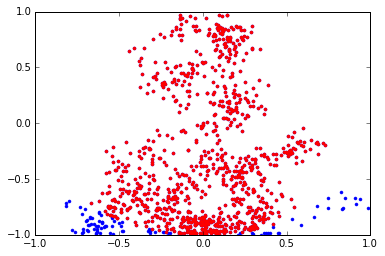

In [45]:
plot(1000,d=0.1)

Almost all points are inside the circle. So, we are overestimating the value of $\pi$. We don't have enough points to explore all the space.

3.329

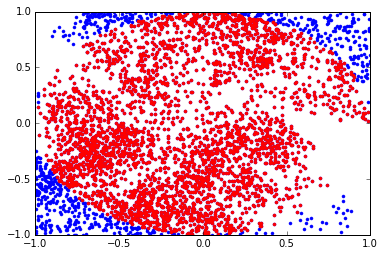

In [46]:
plot(4000,d=0.1)

This simulation is better but not enough. We still have non-negligible white spaces in the square.

3.1844

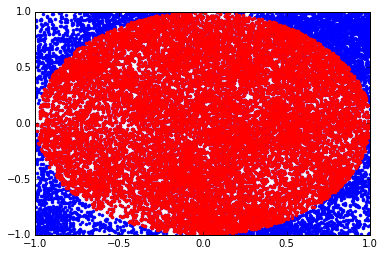

In [49]:
plot(20000,d=0.1)

Here we can see an almost complete distribution over the entire surface, so we have enought points in order to 
get a good estimate of $\pi$.

### 3.2 Optimal stepsize

Here we plot the acceptance in function of of the stepsize d. We see that the bigger the stepsize the less probable is to accept a new move, so the acceptance rate decreases.

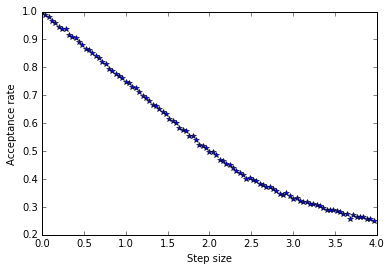

In [50]:
N=10000

d=[i*0.04 for i in range(0,100)]

pi=[0.0 for i in range(0,100)]

a=[0.0 for i in range(0,100)]

for i in range(0,100) :
    pi[i], a[i] = pi_ac(N,d[i])
    
plt.plot(d,a,"*")
plt.xlabel("Step size")
plt.ylabel("Acceptance rate")

We're going to compute the optimal stepsize which gives us the acceptance equal to $\frac{1}{2}$

In [52]:
aa=[abs(a[i]-0.5) for i in range(0,100) ]
# optimal d:
d_opt=d[np.argmin(aa)]
print(d_opt)

2.0


Here we perform again the simulations with the optimal value of the stepsize and see what happens increasing the number of datapoints. Even for few datapoints we can see that we explore more uniformly the space.

3.164

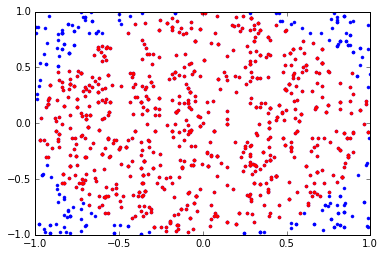

In [53]:
plot(1000,d_opt)

3.135

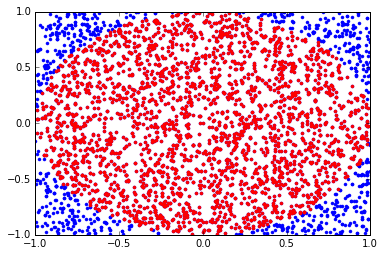

In [56]:
plot(4000,d_opt)

3.1436

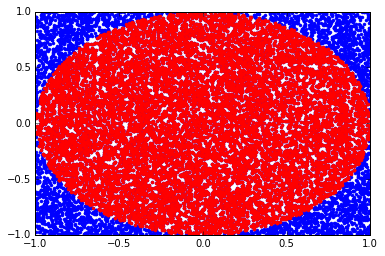

In [58]:
plot(20000,d_opt)

### 3.3 Error estimator

Here we plot the error in computing $\pi$ as a function of datapoints and we see that it goes like $\frac{1}{\sqrt{N}}$

/projects/sage/sage-7.3/local/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/projects/sage/sage-7.3/local/lib/python2.7/site-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/projects/sage/sage-7.3/local/lib/python2.7/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


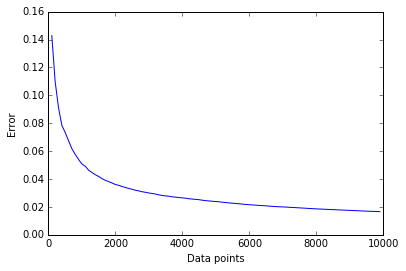

In [59]:
N=10000
S_v=S_vector(N,d_opt)

n=[i for i in range(0,N,100)]

std=[np.std(S_v[0:n[i]]) / np.sqrt(n[i]*1.)  for i in range(len(n))]
    
plt.plot(n,std)
plt.xlabel("Data points")
plt.ylabel("Error")

### 3.1b Bunching strategy

The error computed using the naive estimator is wrong because that estimator is designed for data without correlations. In order to get rid of the correlation we perform a bunching procedure. As expected, the error initially grows and then reaches a plateau which is the exact error. Moreover, we can see that, if we use the optimal stepsize, the error rapidly saturates around the real value, since less steps are required to compute the value of $\pi$.

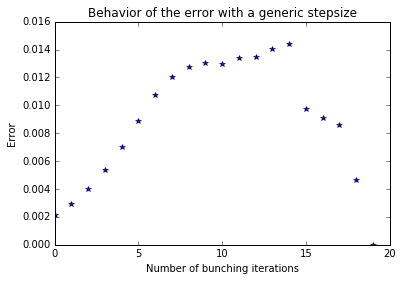

In [68]:
S_v= S_vector(2**20,d=0.1)
     
std=[0.0 for i in range(0,20)]

for i in range(0,20):
    
    S_v=bunching(S_v)
    std[i]= np.std(S_v)/ np.sqrt(len(S_v)*1.)     
    
plt.plot(std,"*")
plt.xlabel("Number of bunching iterations")
plt.ylabel("Error")
plt.title("Behavior of the error with a generic stepsize")

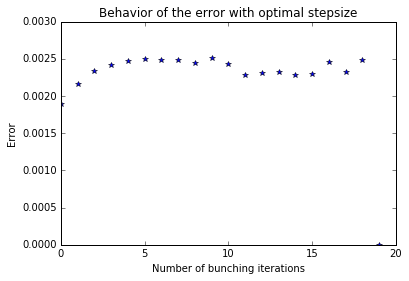

In [65]:
S_v= S_vector(2**20,d=d_opt)
     
std=[0.0 for i in range(0,20)]


for i in range(0,20):
    
    S_v=bunching(S_v)
    std[i]= np.std(S_v)/ np.sqrt(len(S_v)*1.)     
    
plt.plot(std,"*")
plt.xlabel("Number of bunching iterations")
plt.ylabel("Error")
plt.title("Behavior of the error with optimal stepsize")

### 3.2b Why does bunching work?

We reach a plateau in the error because after a certain value of the iterations of the bunching procedure our datapoints are no more correlated. It is a coarse graining procedure: the result is a reduction in coherence length and at a certain point this quantity will tend to zero.
Essentially when the bunchsize is bigger than the correlation length of our original data, then the coarse grained data are not anymore correlated.